# Análisis de Datos con Pandas y Matplotlib

Este script de Python carga un conjunto de datos desde un archivo CSV y utiliza las bibliotecas Pandas y Matplotlib para realizar análisis y visualización de datos.

## Bibliotecas Utilizadas

- **Pandas**: Se utiliza para la manipulación y análisis de datos tabulares.
- **Matplotlib**: Se utiliza para crear visualizaciones de datos.
- **re**: Se utiliza para poder reconocer cadenas que expresadas en la columna duracion que se hara una conversion mas adelante.

In [19]:
import pandas as panda
import matplotlib.pyplot as plot
import re

## Carga de los Datos

Se carga el conjunto de datos desde un archivo CSV utilizando la función `pandas.read_csv()`.


In [20]:
data = panda.read_csv("datos.csv")

## Limpieza de Datos: Eliminación de Espacios Innecesarios

Se utiliza el método `str.strip()` para eliminar espacios innecesarios alrededor de los valores en la columna 'Course Title'.



In [21]:
data['Course Title'].str.strip()
#eliminar espacios innecesarios

0                                       Fashion as Design
1                                  Modern American Poetry
2                               Pixel Art for Video Games
3         Distribución digital de la música independiente
4       The Blues: Understanding and Performing an Ame...
                              ...                        
9590                                     Power Onboarding
9591       Implementing Parent Feedback with Google Forms
9592                          "Making" Progress Teach-Out
9593    Use Microsoft PowerPoint to Create a Visual Sc...
9594    Créer du contenu pour les réseaux sociaux avec...
Name: Course Title, Length: 9595, dtype: object

## Eliminación de Filas Duplicadas

Se utiliza el método `drop_duplicates()` para eliminar filas duplicadas en el DataFrame. La opción inplace=True hace que los cambios se realicen directamente en el DataFrame original.


In [22]:
data.drop_duplicates(inplace=True)


## Manejo de Valores Nulos en la Columna "Rating"

Para manejar los valores nulos en la columna "Rating", se utiliza el método `fillna()` para rellenar los valores nulos con cero.

In [23]:
data['Rating'] = data['Rating'].fillna(0)

## Manejo de Valores Nulos en la Columna "Level"

Para manejar los valores nulos en la columna "Level", se utiliza el método `fillna()` para rellenar los valores nulos con la cadena "Not specified".


In [24]:
data['Level'] = data['Level'].fillna("Not specified")

## Limpieza de la Columna "Review"

Para limpiar la columna "Review", se siguen los siguientes pasos:

1. **Llenar los valores NaN con "0":** Este paso se realiza para asegurarse de que no haya valores nulos en la columna "Review" y evitar errores al procesar los datos. 

2. **Eliminar las comas de los numeros** ya que para convertir a numerico esto sera un inconveniente.

3. **Convertir los numeros en entero** Este paso se realiza para luego utilizarlo en una grafica.


In [25]:
# Limpiar la columna "Review" para eliminar el texto y dejar solo los números
data['Review'] = data['Review'].fillna("0")  # Llenar los valores NaN con "0"
data["Review"] = data["Review"].str.replace(",", "")  # Eliminar las comas
data["Review"] = data["Review"].str.extract('(\d+)').astype(int)  # Extraer solo los números y convertirlos a entero

### Función `convert_to_hours`

Convierte la duración de un curso en diferentes formatos a horas.

#### Parámetros:
- `duration` (str): La duración del curso en formato de cadena.

#### Retorna:
- `int`: La duración del curso en horas.

#### Ejemplos:
```python
convert_to_hours('Approx. 34 hours to complete')  # Retorna 34
convert_to_hours('1 months at 3 hours a week')   # Retorna 12
convert_to_hours('This project should take approximately two hours to complete including, Videos, Tasks, and Quiz')  # Retorna 2
convert_to_hours('one hour') # Retorna 1


In [26]:
def convert_to_hours(duration):
    # Patrón para buscar el número de meses y horas por semana
    pattern1 = r"(\d+) months? at (\d+) hours? a week"
    
    # Buscar coincidencias en la cadena de duración
    match1 = re.search(pattern1, duration)
    total_hours = 0
    # Si hay coincidencias, calcular el total de horas
    if match1:
        months = int(match1.group(1))
        hours_per_week = int(match1.group(2))
        total_hours = months * 4 * hours_per_week  # 4 semanas por mes
        return total_hours
    
    pattern = r"(\d+)\s*(hour|hours|day|days|week|weeks|month|months)"
    matches = re.findall(pattern, duration)
    
    # Convertir cada coincidencia a horas
    for match in matches:
        value, unit = match
        value = int(value)
        
        if "hour" in unit:
            total_hours += value
        elif "day" in unit:
            total_hours += value * 24
        elif "week" in unit:
            total_hours += value * 24 * 7
        elif "month" in unit:
            total_hours += value * 24 * 30  # Tomando 30 días por mes
    
    return total_hours
# Convertir la columna "Duration" a strings
data["Duration"] = data["Duration"].astype(str)

# Aplicar la función a la columna de duración
data["Duration"] = data["Duration"].apply(convert_to_hours)

### Convertir la columna 'Rating' a tipo numérico

La columna 'Rating' contiene las calificaciones de los cursos en algún formato de texto. Para realizar cálculos con estas calificaciones, es necesario convertirlas al tipo de datos numérico. La función `panda.to_numeric` se utiliza para lograr esto. Si hay algún valor que no se pueda convertir a numérico, se manejará estableciéndolo como NaN (no un número) con el parámetro `errors='coerce'`.


In [27]:
# Convertir la columna 'Rating' a tipo numérico para poder calcular el promedio
data['Rating'] = panda.to_numeric(data['Rating'], errors='coerce')



### Agrupar por título del curso y calcular el promedio de calificaciones

En esta sección, se agrupan los datos por el título del curso utilizando el método `groupby()` de Pandas. Luego, se calcula el promedio de calificaciones para cada título de curso utilizando el método `mean()` en la columna 'Rating'. El resultado es un objeto que contiene los promedios de calificaciones para cada título de curso.


In [28]:
# Agrupar por título del curso y calcular el promedio de calificaciones
promedio_calificaciones = data.groupby('Course Title')['Rating'].mean()

promedio_calificaciones_dataframe = panda.DataFrame(promedio_calificaciones)

promedio_calificaciones_dataframe

,Rating
Course Title,
Assisting Public Sector Decision Makers With Policy Analysis,4.8
Atención prehospitalaria del ictus agudo y selección de pacientes para tratamiento endovascular con la escala RACE,4.9
Build a social media presence for your business using Canva,4.7
Build social awareness content for Twitter with Canva,0.0
"Comercio, Inmigración y Tipos de Cambio en un Mundo Globalizado",4.9
...,...
"현대 로봇공학, 강좌 2: 로봇 기구학",0.0
"현대 로봇공학, 강좌 3: 로봇 동역학",0.0
"현대 로봇공학, 강좌 4: 로봇 동작 계획 및 제어",0.0


### Ordenar los Promedios de Calificaciones

En esta sección, se ordenan los promedios de calificaciones almacenados en el DataFrame `promedio_calificaciones_dataframe` en orden descendente y ascendente para identificar los cursos con las calificaciones más altas y más bajas, respectivamente.



In [29]:
mayor_rating = promedio_calificaciones_dataframe.sort_values(by='Rating', ascending=False)
menor_rating = promedio_calificaciones_dataframe.sort_values(by='Rating', ascending=True)
mayor_rating

,Rating
Course Title,
Scrum Master Specialization,5.0
Compromiso del paciente: resultados clínicos satisfactorios Specialization,5.0
Road to the CISO – Culminating Project Course,5.0
Uncommon Sense Teaching: Teaching Online,5.0
Global Health Challenges and Governance Specialization,5.0
...,...
CAD/BIM技術與應用專項課程（CAD/BIM Specialization),0.0
Diversity and Belonging in Businesses and Organizations,0.0
Science of Firearm Injury Prevention Among Children & Teens,0.0


In [30]:
menor_rating

,Rating
Course Title,
"현대 로봇공학, 강좌 6: 캡스톤 프로젝트, 모바일 매니퓰레이션",0.0
The Basics of Rocket Science,0.0
Financiamiento en proyectos de infraestructura sostenible,0.0
The Basics of Libertarian Free Will,0.0
Find Your Calling: Career Transition Principles for Veterans,0.0
...,...
Networking Fundamentals,5.0
Road to the CISO – Culminating Project Course,5.0
Rapid Prototyping and Tooling Specialization,5.0


### Filtrar Cursos con Horario Flexible

En esta sección, se filtran los cursos que tienen un horario flexible, luego se compara con la cantidad total de cursos y se calcula el porcentaje redondeado a dos decimales.



In [31]:
# Filtrar los cursos con horario flexible
cursos_horario_flexible = data[data['Schedule'] == 'Flexible schedule']

# Contar el número de cursos con horario flexible
num_cursos_horario_flexible = len(cursos_horario_flexible)

# Calcular el porcentaje de cursos con horario flexible respecto al total
porcentaje = (num_cursos_horario_flexible / len(data)) * 100

# Redondear el resultado a dos decimales
porcentaje_redondeado = round(porcentaje, 2)

print("Porcentaje de cursos con horario flexible en relación con el total de cursos:", porcentaje_redondeado, "%")

Porcentaje de cursos con horario flexible en relación con el total de cursos: 92.63 %


### Grafico de barras con el numero de cursos en cada nivel de dificultad
Se puede documentar que en esta grafica la preferenia de creacion de cursos esta para el nivel de principiantes por lo que predomina la cantidad de cursos de este nivel. 

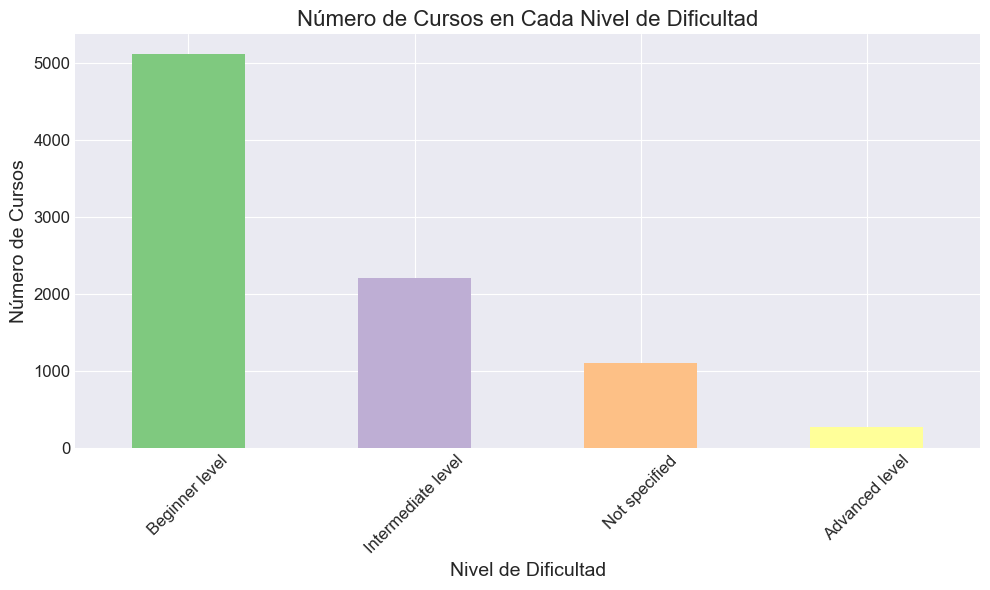

In [32]:
# Contar el número de cursos en cada nivel de dificultad
nivel_counts = data['Level'].value_counts()

# Crear la gráfica de barras
plot.figure(figsize=(10, 6))  # Tamaño de la gráfica
nivel_counts.plot(kind='bar', color=plot.cm.Accent(range(len(nivel_counts))))  # Tipo de gráfico y color de las barras

# Agregar etiquetas y título
plot.xlabel('Nivel de Dificultad', fontsize=14)
plot.ylabel('Número de Cursos', fontsize=14)
plot.title('Número de Cursos en Cada Nivel de Dificultad', fontsize=16)

# Ajustar el tamaño de las etiquetas de los ejes
plot.xticks(rotation=45, fontsize=12)  # Rotar etiquetas del eje x para una mejor legibilidad
plot.yticks(fontsize=12)

# Mostrar la gráfica
plot.tight_layout()  # Ajustar diseño para evitar recorte de etiquetas
plot.show()

### Grafico de Barras Horizontales del numero de cursos de las principales categorias (Keyword)
Este grafico es generado a travez e contar las principales categorias de la columna Keyword y armando la grafica se pueden observar las principales categorias de los cursos predominando Social Sciences, Personal Development y Health.

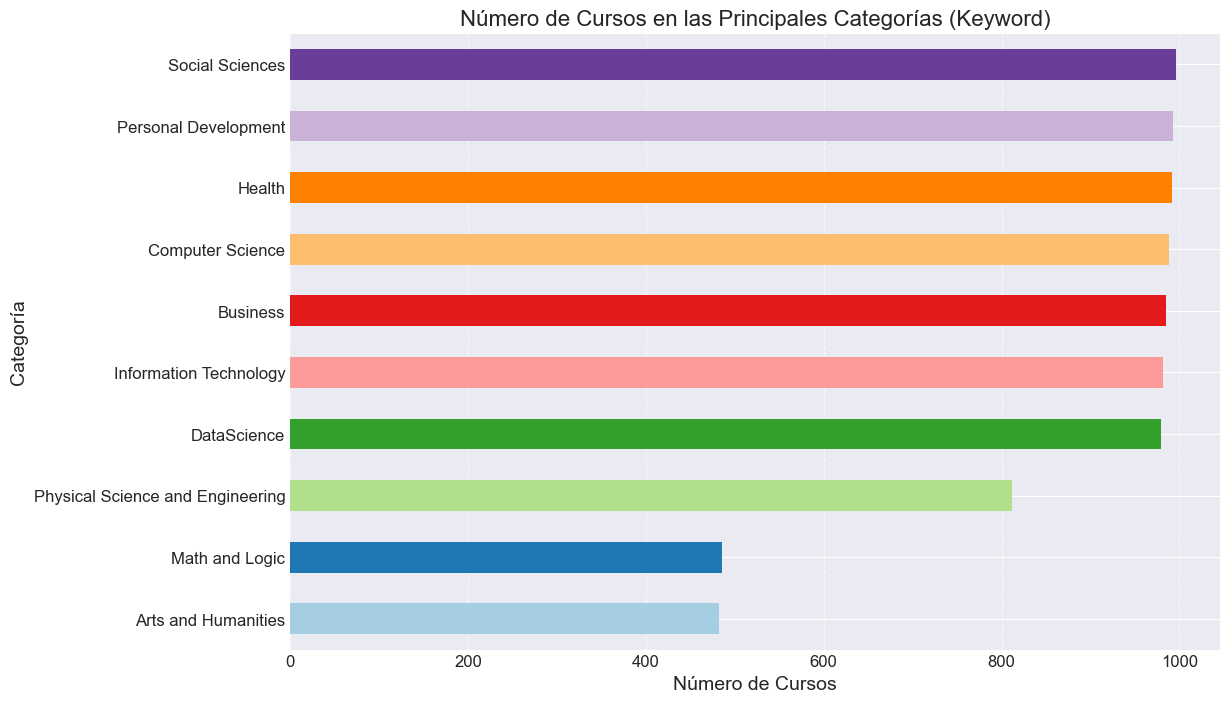

In [33]:
# Contar el número de cursos en cada categoría
categoria_counts = data['Keyword'].value_counts().head(20)  # Tomar las 10 principales categorías

# Crear la gráfica de barras horizontales
plot.figure(figsize=(12, 8))
categoria_counts.sort_values().plot(kind='barh', color=plot.cm.Paired(range(len(categoria_counts))))
plot.title('Número de Cursos en las Principales Categorías (Keyword)', fontsize=16)
plot.xlabel('Número de Cursos', fontsize=14)
plot.ylabel('Categoría', fontsize=14)
plot.grid(axis='x', linestyle='--', alpha=0.7)

# Ajustar el tamaño de las etiquetas de los ejes
plot.xticks(fontsize=12)
plot.yticks(fontsize=12)

# Mostrar el gráfico
plot.show()


### Grafico de dispersion entre duracion de curso y numero de revisiones
Este se puede observar que los resultados obtenidos es que las personas prefieren mas los cursos no tan largos, por lo que obtienen mas visualizaciones por lo que se recomienda los cursos muy largos mejor seccionarlos. 

C:\Users\luisb\AppData\Local\Temp\ipykernel_17836\759147269.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plot.style.use('seaborn-darkgrid')


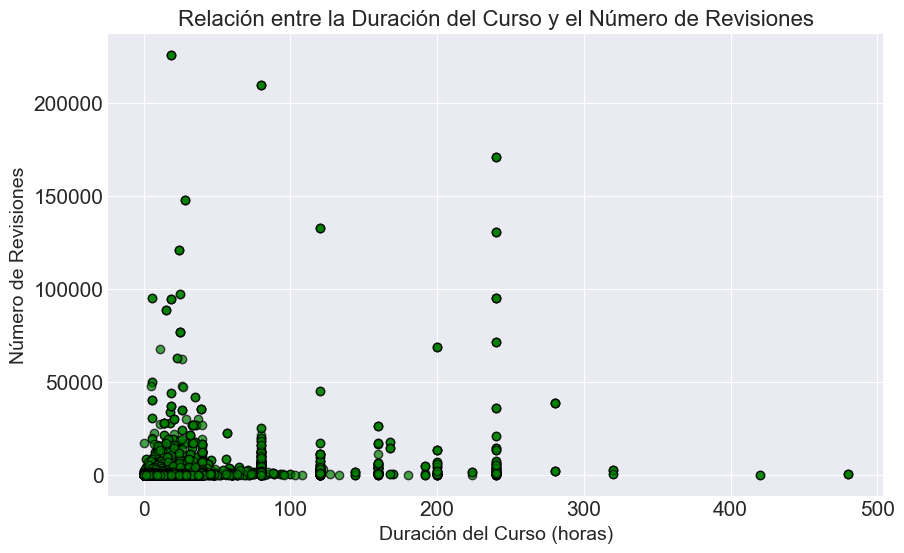

In [34]:

# Configurar el estilo del gráfico
plot.style.use('seaborn-darkgrid')

# Crear el gráfico de dispersión
plot.figure(figsize=(10, 6))
plot.scatter(data["Duration"], data["Review"], alpha=0.7, color='green', edgecolors='black')

# Agregar etiquetas y título
plot.title('Relación entre la Duración del Curso y el Número de Revisiones', fontsize=16)
plot.xlabel('Duración del Curso (horas)', fontsize=14)
plot.ylabel('Número de Revisiones', fontsize=14)

# Ajustar el tamaño de las etiquetas de los ejes
plot.xticks(fontsize=15)
plot.yticks(fontsize=15)

# Mostrar la rejilla
plot.grid(True)

# Mostrar el gráfico
plot.show()


### Grafico histograma con la distribucion de la duracion de cursos
Se puede observar una mayor cantidad de cursos de poca duracion y la menor cantidad con cursos de larga duracion.

C:\Users\luisb\AppData\Local\Temp\ipykernel_17836\2988241245.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plot.style.use('seaborn-darkgrid')


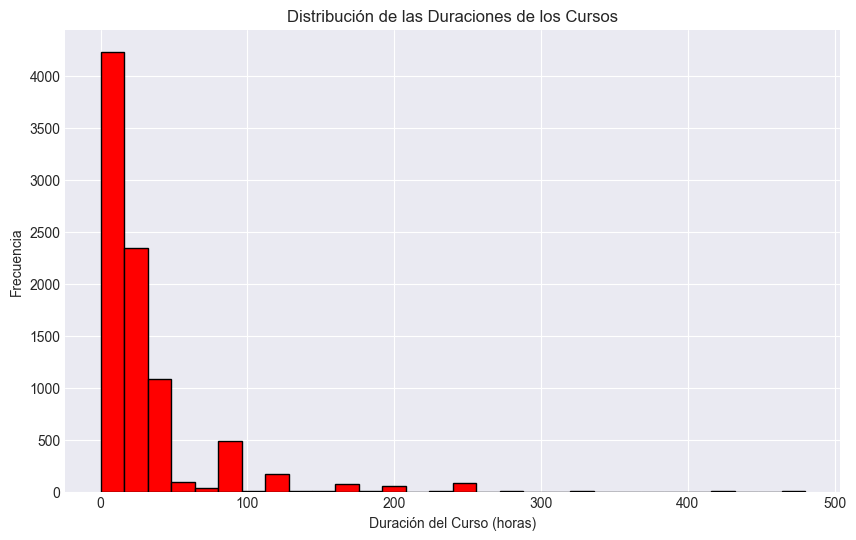

In [35]:
# Crear el histograma
plot.figure(figsize=(10, 6))
plot.style.use('seaborn-darkgrid')
plot.hist(data["Duration"], bins=30, color='red', edgecolor='black')

# Agregar etiquetas y título
plot.title('Distribución de las Duraciones de los Cursos')
plot.xlabel('Duración del Curso (horas)')
plot.ylabel('Frecuencia')

# Mostrar el histograma
plot.grid(True)
plot.show()

### Grafico mostrando la distribucion de calificaciones por nivel de dificultad
Este grafico se puede apreciar los resultados que la mayoria de cursos sin importar la dificultad tiene una media de calificacion bastante buena mostrando algunas calificaciones extremas pero no siendo tan relevantes para la cantidad de cursos que brinda la plataforma.

C:\Users\luisb\AppData\Local\Temp\ipykernel_17836\948581094.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plot.style.use('seaborn-darkgrid')


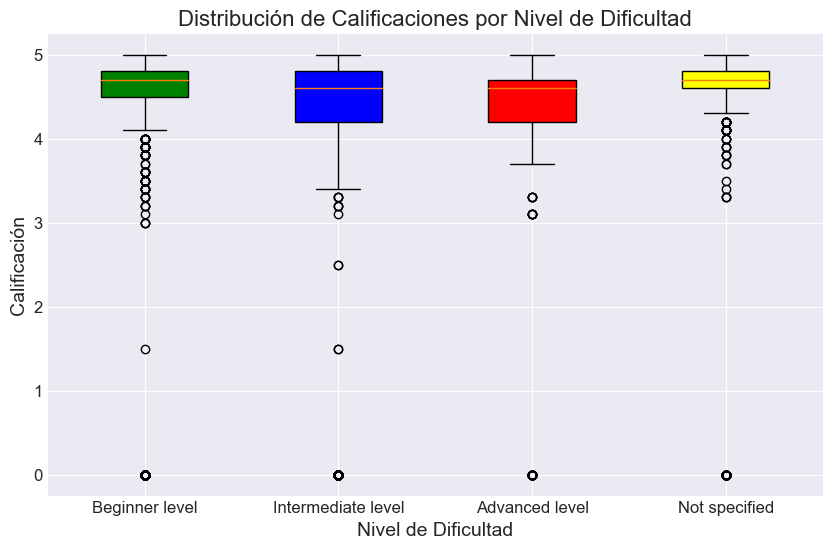

In [36]:
# Configurar el estilo del gráfico
plot.style.use('seaborn-darkgrid')

# Crear el gráfico de cajas
plot.figure(figsize=(10, 6))
box = plot.boxplot([data[data['Level'] == 'Beginner level']['Rating'],
                   data[data['Level'] == 'Intermediate level']['Rating'],
                   data[data['Level'] == 'Advanced level']['Rating'],
                   data[data['Level'] == 'Not specified']['Rating']],
                  labels=['Beginner level', 'Intermediate level', 'Advanced level', 'Not specified'],
                  patch_artist=True)  # Para rellenar las cajas con color

# Personalizar colores
colors = ['green', 'blue', 'red', 'yellow']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Agregar etiquetas y título
plot.title('Distribución de Calificaciones por Nivel de Dificultad', fontsize=16)
plot.xlabel('Nivel de Dificultad', fontsize=14)
plot.ylabel('Calificación', fontsize=14)

# Ajustar el tamaño de las etiquetas de los ejes
plot.xticks(fontsize=12)
plot.yticks(fontsize=12)

# Mostrar el gráfico
plot.show()


## Conclusion general

El uso de Python, junto con herramientas como Jupyter Notebook, ofrece una serie de ventajas significativas para el análisis de datos y la creación de gráficas:

- Facilidad de Uso: Python es conocido por su sintaxis clara y legible, lo que facilita la escritura y comprensión del código. Esto lo hace ideal para científicos de datos y analistas que desean realizar análisis complejos de manera eficiente.

- Amplia Variedad de Bibliotecas: Python cuenta con una amplia variedad de bibliotecas específicamente diseñadas para el análisis de datos, como Pandas, NumPy, Matplotlib eficientes para manipular datos y crear visualizaciones informativas.

- Interactividad y Exploración de Datos: Jupyter Notebook permite la creación de documentos interactivos que combinan código ejecutable, visualizaciones y texto explicativo en un solo lugar. 

- Creación de Gráficas Personalizadas: Matplotlib ofrece flexibilidad y control para la creación de una amplia gama de gráficas personalizadas, desde simples diagramas de barras hasta mas complejas utilizadas en esta practica.


Cabe resaltar que se pueden interpretar la informacion que proporciona las graficas y se puede observar que los cursos en tendencia son los cursos de poca duracion al tener bastantes vistas y el contenido para principiantes lo cual puede ser beneficioso interpretarlo para la realizacion de futuros cursos, tambien una observacion es no crear cursos demasiado largos en duracion,tratando de fraccionarlos de alguna manera por temas.